#### Import the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

#### Importing the data

In [2]:
raw_csv_data = pd.read_csv('original.csv')

In [3]:
# copy the original data here for reference
original_data = raw_csv_data.copy()

#### Examining the data

In [4]:
original_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


#### describe function
- count: it goes the total number of observation (number of data) in each column(index)
- mean: The average value of observation in each column
- The percentile are the percentage of the data that have the value it returns
- min: the minimum value in each observation

In [5]:
# describe the data
original_data.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
# checking not avalable elements i.e (missing values)
original_data.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [7]:
# determine and return the number of missing values for each column of the data set 
original_data.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [8]:
# checking NA in sepcific column purposefully useful for a large database
original_data.spx.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
6264    False
6265    False
6266    False
6267    False
6268    False
Name: spx, Length: 6269, dtype: bool

#### Plotting the data

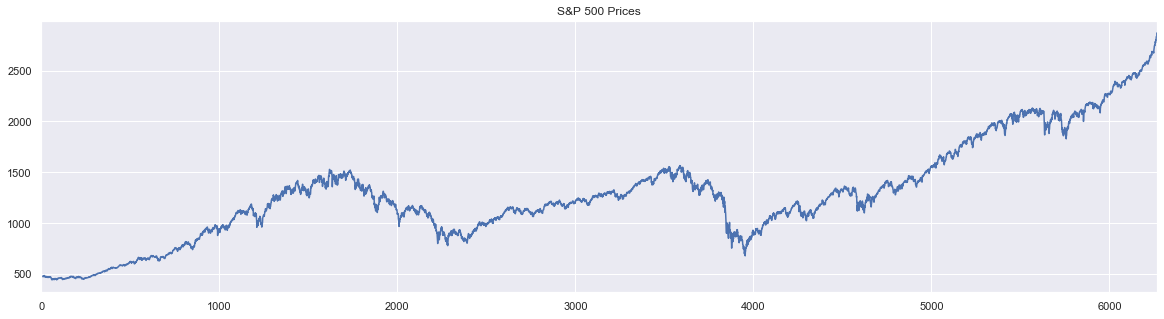

In [9]:
# plotting to have visual obervation about a specific column
original_data.spx.plot(figsize=(20, 5), title = "S&P 500 Prices")
plt.show()

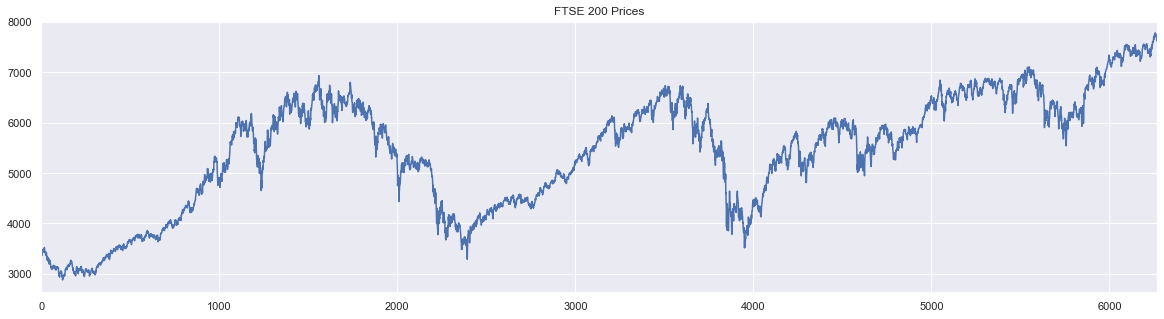

In [10]:
# plotting to have visual obervation about a specific column
original_data.ftse.plot(figsize=(20, 5), title = "FTSE 200 Prices")
plt.show()

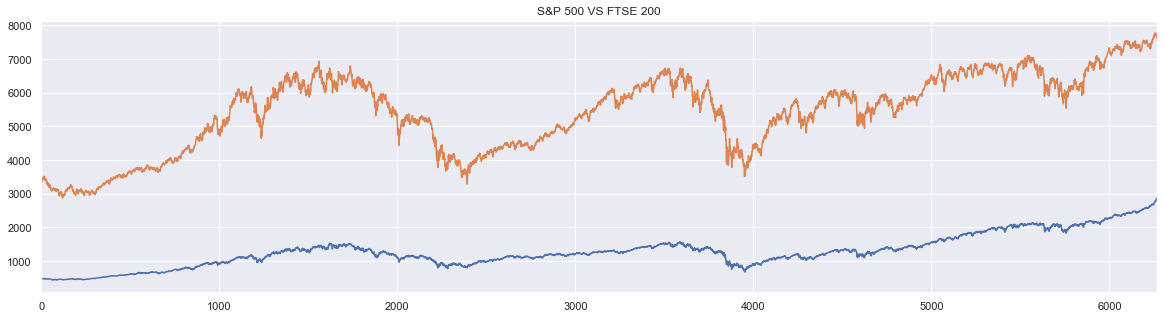

In [11]:
# merge the two graphs
original_data.spx.plot(figsize=(20, 5), title = "S&P 500 Prices")
original_data.ftse.plot(figsize=(20, 5), title = "FTSE 200 Prices")
plt.title("S&P 500 VS FTSE 200")
plt.show()

#### QQ Plot
- Quantile Quantile Plot (QQ Plot) 
- Use to determine whether a data is distrubuted in a certain way
- Usually showcase how the data fits a Normal Distribution

In [12]:
import scipy.stats
import pylab

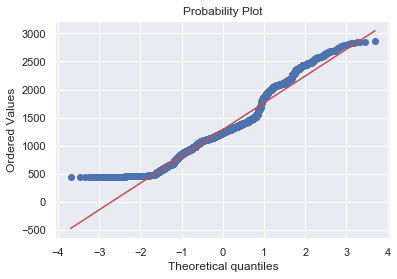

In [13]:
# QQ Plot of a specfic column
scipy.stats.probplot(original_data.spx, plot=pylab)
pylab.show()

#### Length of the time peroid

In [14]:
original_data.date.describe()

count           6269
unique          6269
top       06/10/1998
freq               1
Name: date, dtype: object

In [15]:
# transform the date column to date type
original_data.date = pd.to_datetime(original_data.date, dayfirst=True)

In [16]:
# explore the observation
original_data.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [17]:
# check whether it's been converted
original_data.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

#### setting a specific column as the index of the data

In [18]:
original_data.set_index("date", inplace=True)

In [19]:
original_data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### Setting the desired frequency

In [20]:
# setting the frequency of the data
original_data = original_data.asfreq('b')

In [21]:
original_data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### Handling Missing values

In [22]:
original_data.isna()
# True => There are missing values for the period
# False => There are no missing values for the period

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [23]:
original_data.isna().sum()
# Foe each attributes, this will determine the number of instances without available information

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

#### Filling Missing values with different methods using fillna method
- fillna goes through the entire dataset and replace any observation with a missing value
- Front filling: Assign the value of the previous period to the next value that has missing value
- Back filling: Assign the next value to the previous empty value
- Assign the same value (the average of the data (mean) to all the missing values) This is a bad approach for a time series data
- Note: Removing redundant columns decrease the size of the data and makes going through it faster

In [24]:
# filling the missing values in a specific column
# Note to replace the original column
original_data.spx = original_data.spx.fillna(method = 'ffill')

In [25]:
# it's alwaysa good ideas to recheck the entire data to know the progress and what next to tackle
original_data.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [26]:
# back fill the missing value in the ftse column
original_data.ftse = original_data.ftse.fillna(method = 'bfill')

In [27]:
original_data.isnull().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [28]:
# fill the missing value in the dax column with the mean value
original_data.dax = original_data.dax.fillna(value = original_data.dax.mean())

In [29]:
original_data.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [30]:
# fill the nikkei column with the mean value
original_data.nikkei = original_data.nikkei.fillna(value = original_data.nikkei.mean())

In [31]:
# recheck
original_data.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

#### Simplifying the dataset

In [32]:
# creating a new coulumn and fill the data with spx data
original_data['market_value'] = original_data.spx

In [33]:
original_data.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.055700,1288.642547
std,487.868210,2752.604984,1145.568370,4040.545253,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10711.090000,992.715221
50%,1233.761241,5774.380000,5663.300000,15014.040000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17858.420000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [34]:
# deleting the spx column
del original_data['spx']

In [35]:
original_data.describe()

,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,6080.063363,5423.690398,14597.055700,1288.642547
std,2752.604984,1145.568370,4040.545253,487.868210
min,1911.700000,2876.600000,7054.980000,438.920000
25%,4070.460000,4487.880000,10711.090000,992.715221
50%,5774.380000,5663.300000,15014.040000,1233.761241
75%,7442.660000,6304.630175,17858.420000,1460.250000
max,13559.600000,7778.637689,24124.150000,2872.867839


In [36]:
# deleting multiple columns
del original_data['dax'], original_data['ftse'], original_data['nikkei']

In [37]:
original_data.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


#### Splitting the data
- we need to split our data into 2 sets (Training and Testing Set)
- Compare predictions to actual value
- The closer the forecast, the better the model
- we usally shuffle the dat but shuffling is impossible in time series data becasue t relies heavily on the chronological order of the data
- Training Set: From the beginning up to some cut off point(sequences)
- 80/20 splitting is reasonable or 85/15
- use iloc method to split the data into indexes (iloc means index location)

In [38]:
# use the length function to get the entire dataset lenght and take 80 percent as the training data
size = int(len(original_data) * 0.8)

In [39]:
# fro the beging to the size
train_set = original_data.iloc[:size]

In [40]:
# from the size to the end
test_set = original_data.iloc[size:]

In [41]:
#checking for data overlap in our splitting
# Note: The last observation of the train set shouls be followed by the first observation of the test set chronolohically
train_set.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [42]:
test_set.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


#### White Noise

In [43]:
white_noise = np.random.normal(loc = original_data.market_value.mean(), scale = original_data.market_value.std(), size = len(original_data))

In [44]:
# Adding the white Noise to the data
original_data['white_noise'] = white_noise

In [45]:
original_data.describe()

,market_value,white_noise
count,6277.000000,6277.000000
mean,1288.642547,1289.247382
std,487.868210,488.702534
min,438.920000,-544.744544
25%,992.715221,963.902206
50%,1233.761241,1285.549991
75%,1460.250000,1626.527343
max,2872.867839,3030.967269


Text(0.5, 1.0, 'white noise time series')

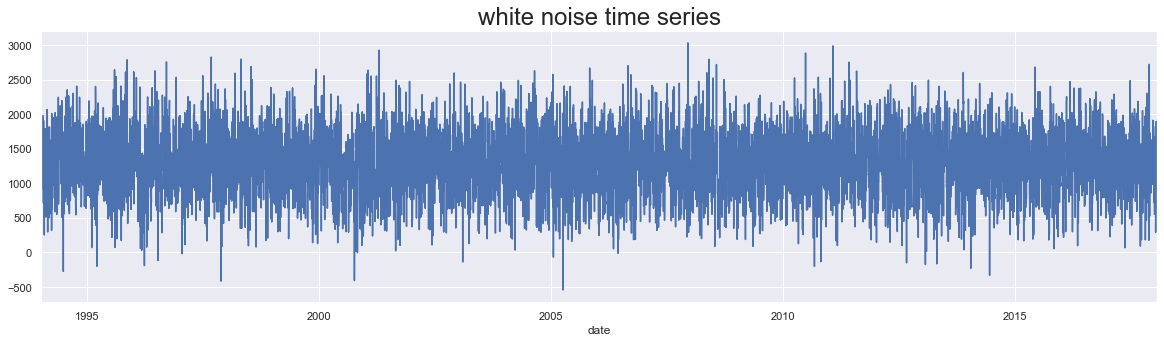

In [46]:
# plot the graphs of each column to have a better sense of the differences
original_data.white_noise.plot(figsize=(20, 5)) # increasing the size of the plot
plt.title('white noise time series', size = 24)

Text(0.5, 1.0, 'market value time series')

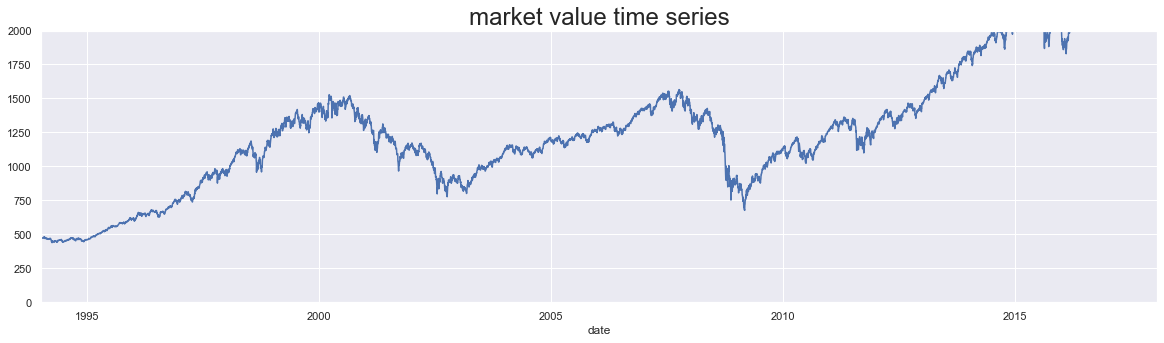

In [47]:
original_data.market_value.plot(figsize=(20, 5)) #dimension of the graph is 20,5
plt.ylim(0, 2000) # setting the limit of the y axis of the graph to range from 0-2000
plt.title('market value time series', size=24) # title letter size = 24

#### Random Walk

In [48]:
random_walk = pd.read_csv('RandomWalk.csv')

In [49]:
random_walk.date = pd.to_datetime(random_walk.date, dayfirst = True)
random_walk.set_index('date', inplace=True)
random_walk = random_walk.asfreq('b')

In [50]:
random_walk.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [51]:
# we want to add the random_walk data to the original data we were working with before
original_data['random_walk'] = random_walk.price

In [52]:
original_data.head()

,market_value,white_noise,random_walk
date,,,
1994-01-07,469.90,1045.967079,1122.139662
1994-01-10,475.27,1552.429408,1080.347860
1994-01-11,474.13,919.871651,1082.095245
1994-01-12,474.17,1269.420866,1083.639265
1994-01-13,472.47,1752.557294,1067.146255


Text(0.5, 1.0, 'random walk')

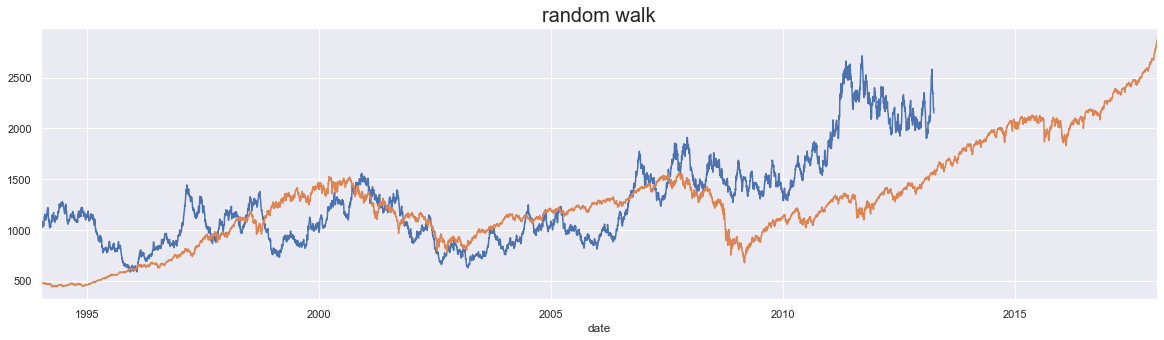

In [53]:
# plot the random walk column and market value column
original_data.random_walk.plot(figsize=(20, 5))
original_data.market_value.plot()
plt.title('random walk', size=20)

#### Seasonality Test
using the dickey-fuller seasonality test to check the seasonality of a particular column with Augemented dickey-fuller method

In [54]:
# here we are checking for the marjet_value column seasonality
sts.adfuller(original_data.market_value)

(1.1194986381728387,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.20986775002)

In [55]:
# here we are checking for the white noise column seasonality
sts.adfuller(original_data.white_noise)

(-78.73196224904274,
 0.0,
 0,
 6276,
 {'1%': -3.4313923799633836,
  '5%': -2.862000639842268,
  '10%': -2.567015195598801},
 95020.25071880168)

In [56]:
original_data.random_walk = original_data.random_walk.fillna(method='ffill')

In [57]:
original_data.random_walk.isna().sum()

0

In [58]:
# here we are checking for the random walk column seasonality
sts.adfuller(original_data.random_walk)

(-1.337715751536085,
 0.6117456205357736,
 24,
 6252,
 {'1%': -3.431396383066701,
  '5%': -2.8620024085488898,
  '10%': -2.5670161371235163},
 56526.358350839684)

#### Seasonality test to check the seasonality of a column
- Trends
- Seasonal
- Residual
Types
- Additive
- Multiplicative

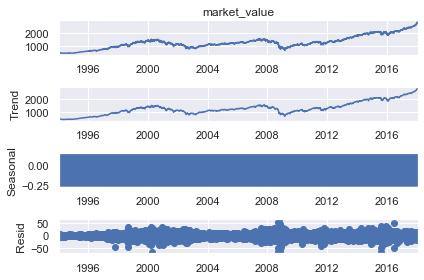

In [59]:
# checking for seasonal decomposition of the market value column
additive_seasonal_decomposition = seasonal_decompose(original_data.market_value, model = "additive")
additive_seasonal_decomposition.plot()
plt.show()

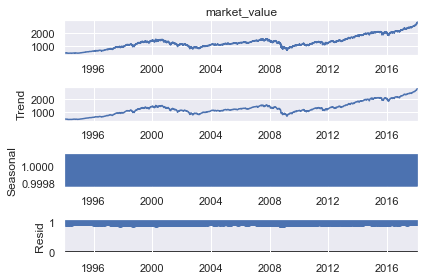

In [60]:
# checking for seasonal decomposition of the market value column
multiplicative_seasonal_decomposition = seasonal_decompose(original_data.market_value, model = "multiplicative")
multiplicative_seasonal_decomposition.plot()
plt.show()
# it showsno seasonality among the values

#### Autocorrelation Function (ACF)

Text(0.5, 1.0, 'ACF Market value')

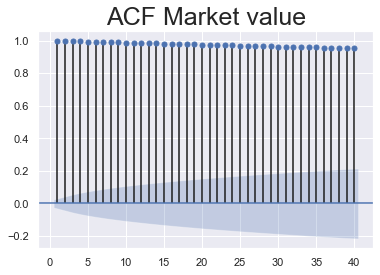

In [61]:
# plotting autocorrelation for the market value column
sgt.plot_acf(original_data.market_value, lags = 40, zero = False) 
# Analysing the last 40 periods, the default is the entire series
# zero indicate itself the current value) not included means False
plt.title("ACF Market value", size = 25)
# X axis => the lags
# Y axis => correlation coefficient
# blue region indicates the significance

Text(0.5, 1.0, 'ACF Market value')

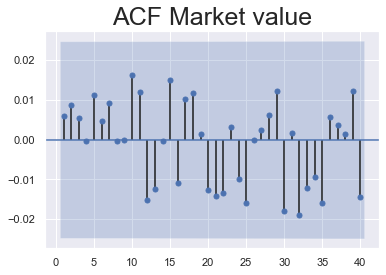

In [62]:
# plotting autocorrelation for the white noise column
sgt.plot_acf(original_data.white_noise, lags = 40, zero = False) 
# Analysing the last 40 periods, the default is the entire series
# zero indicate itself(the current value), not included means False
plt.title("ACF Market value", size = 25)
# X axis => the lags
# Y axis => correlation coefficient
# there's no autocorrelation

#### Partial Autocorrelation Function (PACF)

Text(0.5, 1.0, 'PCAF')

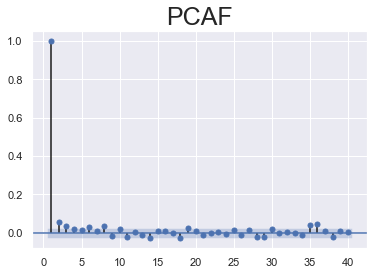

In [63]:
# PCAF for market value
sgt.plot_pacf(original_data.market_value, lags = 40, zero = False, method = 'ols') #order least suare
plt.title("PCAF", size=25)

Text(0.5, 1.0, 'PCAF')

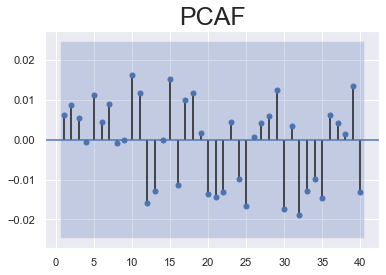

In [64]:
# PCAF for white noise
sgt.plot_pacf(original_data.white_noise, lags = 40, zero = False, method = 'ols') #order least suare
plt.title("PCAF", size=25)